## Optimal betting strategy in a multi-round die tossing game with non-linear payout multipliers

### Description

You are participating in a multi-round betting game with two players. In each round, both players place their bets simultaneously without knowing the other's bet. The outcome of each round is determined by rolling a fair 6-sided die. The payout structure is as follows:

- If the outcome is 1 or 2, Player A wins and receives a payout based on their bet.
- If the outcome is 3 or 4, Player B wins and receives a payout based on their bet.
- If the outcome is 5 or 6, both players lose their bets.

Each player has an initial amount of W1 and W2 dollars, respectively. The game lasts for n rounds. Players can bet up to 10% of their net worth at every round. The payout multiplier function is:

- Player A's payout multiplier is k_A(bet_A) = 1 + log(1 + bet_A) where bet_A is the bet amount of player A at each round
- Player B's payout multiplier is k_B(bet_B) = 2 + sqrt(bet_B) where bet_B is the bet amount of player B at each round 

Your task is to determine the optimal betting strategy for Player A to maximize their expected total amount after n rounds, considering Player B is also trying to maximize their payout.

In [21]:
import math
import matplotlib.pyplot as plt
from tqdm import tqdm

In [22]:
def E_A(bet_A):
    return 1/3 * (1 + math.log(1 + bet_A)) * bet_A - 1/3 * bet_A

In [23]:
def E_B(bet_B):
    return 1/3 * (2 + math.sqrt(bet_B)) *bet_B - 1/3 * bet_B

In [24]:
def derivative_E_A(x):
    #Calculate the derivative manually
    return 1/3 * (math.log(1+x) + (x /(1+x)))

In [25]:
def derivative_E_B(x):
    #Calculate the derivative manually
    return 1/3 * (1 + 3/2 * math.sqrt(x))

In [26]:
def find_max_payout(step,W, player):
    optimal_bet = 0;
    max_bet = 0.1 * W;
    max_EV = float('-inf')
    #Iterative approach
    for bet in tqdm(range(0,int(max_bet/step + 1))):
        bet = bet * step
        if player == 'A':
            temp = derivative_E_A(bet);
        else:
            temp = derivative_E_B(bet);
        if temp > 0 and bet <= W:
            EV = E_A(temp) if player == 'A' else E_B(temp);
            if EV > max_EV:
                max_EV = EV;
                optimal_bet = bet;
    return optimal_bet
    

In [27]:
def optimal_strategy(W_A, W_B,n):
    #Iterative approach
    step = 1
    total_W_A = W_A
    total_W_B = W_B
    optimal_bets_A = [];
    optimal_bets_B = [];
    wealth_A = [W_A]
    wealth_B = [W_B]
    
    
    for i in tqdm(range(n)):
        optimal_bet_A = find_max_payout(step, total_W_A,'A')
        optimal_bet_B = find_max_payout(step, total_W_B,'B')
        optimal_bets_A.append(round(optimal_bet_A,4));
        optimal_bets_B.append(round(optimal_bet_B,4));
        
        total_W_A += round(E_A(optimal_bet_A),4)
        wealth_A.append(total_W_A)
        total_W_B += round(E_B(optimal_bet_B),4)
        wealth_B.append(total_W_B)
    return total_W_A, total_W_B,optimal_bets_A, optimal_bets_B, wealth_A, wealth_B

In [28]:
total_W_A, total_W_B,optimal_bets_A, optimal_bets_B, wealth_A, wealth_B = optimal_strategy(100, 100, 10)

100%|██████████| 11/11 [00:00<?, ?it/s][A

100%|██████████| 11/11 [00:00<?, ?it/s][A

100%|██████████| 11/11 [00:00<?, ?it/s][A

100%|██████████| 12/12 [00:00<?, ?it/s][A

100%|██████████| 12/12 [00:00<?, ?it/s][A

100%|██████████| 13/13 [00:00<?, ?it/s][A

100%|██████████| 13/13 [00:00<?, ?it/s][A

100%|██████████| 15/15 [00:00<00:00, 14993.94it/s]

100%|██████████| 14/14 [00:00<?, ?it/s][A

100%|██████████| 17/17 [00:00<?, ?it/s][A

100%|██████████| 15/15 [00:00<?, ?it/s][A

100%|██████████| 20/20 [00:00<?, ?it/s][A

100%|██████████| 16/16 [00:00<?, ?it/s][A

100%|██████████| 24/24 [00:00<?, ?it/s][A

100%|██████████| 18/18 [00:00<?, ?it/s][A

100%|██████████| 28/28 [00:00<?, ?it/s][A

100%|██████████| 19/19 [00:00<?, ?it/s][A

100%|██████████| 34/34 [00:00<?, ?it/s][A

100%|██████████| 21/21 [00:00<00:00, 21076.90it/s]

100%|██████████| 10/10 [00:00<00:00, 108.76it/s]


Text(0.5, 0, 'Number of rounds')

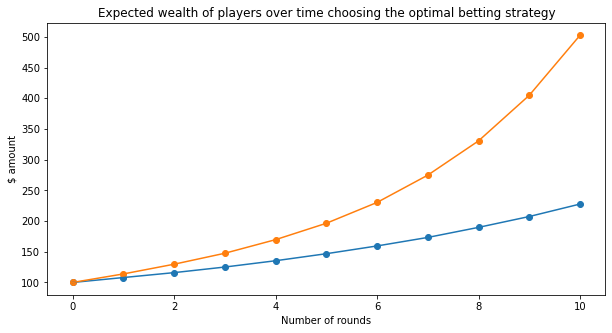

In [36]:
plt.figure(figsize = (10,5))
plt.plot(range(0,11), wealth_A)
plt.scatter(range(0,11), wealth_A)
plt.plot(range(0,11), wealth_B)
plt.scatter(range(0,11), wealth_B)
plt.title("Expected wealth of players over time choosing the optimal betting strategy")
plt.ylabel("$ amount")
plt.xlabel("Number of rounds")

Text(0.5, 0, 'Number of rounds')

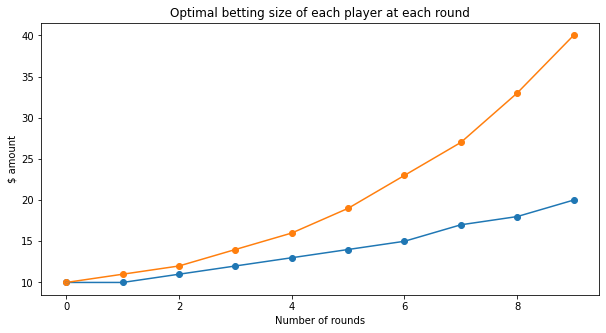

In [39]:
plt.figure(figsize = (10,5))
plt.plot(range(0,10), optimal_bets_A)
plt.scatter(range(0,10), optimal_bets_A)
plt.plot(range(0,10), optimal_bets_B)
plt.scatter(range(0,10), optimal_bets_B)
plt.title("Optimal betting size of each player at each round")
plt.ylabel("$ amount")
plt.xlabel("Number of rounds")